## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.  

### Load first line of JSON file and convert to dataframe. 

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

In [2]:
with open('logins.json') as data_file:
    data = json.load(data_file)
df = pd.DataFrame(data)   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


In [3]:
df.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [4]:
df.tail(10)

,login_time
93132,1970-04-13 18:36:53
93133,1970-04-13 18:40:31
93134,1970-04-13 18:46:06
93135,1970-04-13 18:40:40
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [5]:
df.login_time.min(), df.login_time.max()

('1970-01-01 20:12:16', '1970-04-13 18:57:38')

### 1. This dataset contains just over three months data, starting just after 8:00pm on 1/1/70. It ends around 7:00pm on 4/13/70.  
### 2. The login timestamps are not in order of time, and some of them are off by over 10 minutes. Makes me curious about how the logging happens and if it is working correctly.  
### Is there a problem with some of the logging being delayed or is there a problem with some of the timestamps themselves? Could they be logging at the end of a process instead of the beginning?


In [6]:
df['login_time'] = pd.to_datetime(df['login_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


### Check for missing time values. 

In [7]:
df[(df.login_time.dt.hour == 0) & (df.login_time.dt.minute == 0) & (df.login_time.dt.second == 0)].login_time

32456   1970-02-15
37739   1970-02-21
Name: login_time, dtype: datetime64[ns]

### Two observations have dates but no times. Drop these values as they are bad data.  

In [8]:
df.count()

login_time    93142
dtype: int64

In [9]:
df = df[~((df.login_time.dt.hour == 0) & (df.login_time.dt.minute == 0) & (df.login_time.dt.second == 0))]

In [10]:
df.count()

login_time    93140
dtype: int64

### Are any date values missing?

In [11]:
df[(df.login_time.dt.day == 0) | (df.login_time.dt.month == 0) | (df.login_time.dt.year == 0)].login_time

Series([], Name: login_time, dtype: datetime64[ns])

### No missing dates.  



### Sort the entries. 

In [12]:
sorted = df.sort_values(by='login_time')

In [13]:
sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93140 entries, 6 to 93140
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93140 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [14]:
sorted.head(10)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
5,1970-01-01 20:21:41
10,1970-01-01 20:26:05
4,1970-01-01 20:26:21
11,1970-01-01 20:31:03
12,1970-01-01 20:34:46


### Aggregate login counts based on 15 minute intervals. 

In [15]:
df_15m = pd.DataFrame(sorted.resample('15T', on='login_time').size(), columns=['count'])

In [16]:
df_15m.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


In [17]:
df_15m.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


### Plot the data. 

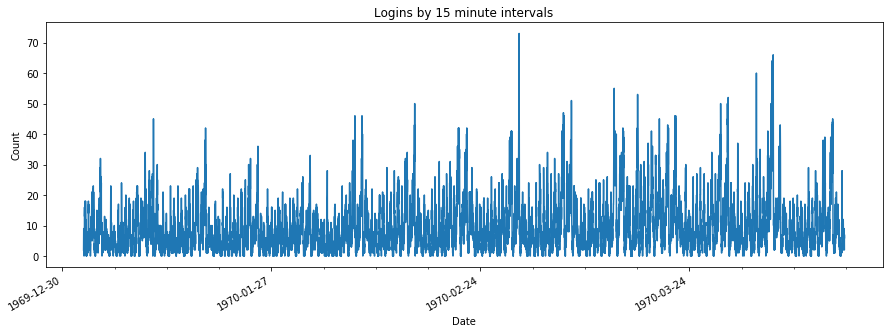

In [18]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Logins by 15 minute intervals')
plt.ylabel('Count')
plt.xlabel('Date')
ax.plot(df_15m['count'])
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1))
plt.show()

### Seems to have a daily cycle but need to look more closely to see when peaks and valleys are happening. Also seems to be a weekly cycle with bigger peaks one or two days per week.   

### Look at one month at a time to see more detail. Differentiate weekends by highlighting them.  

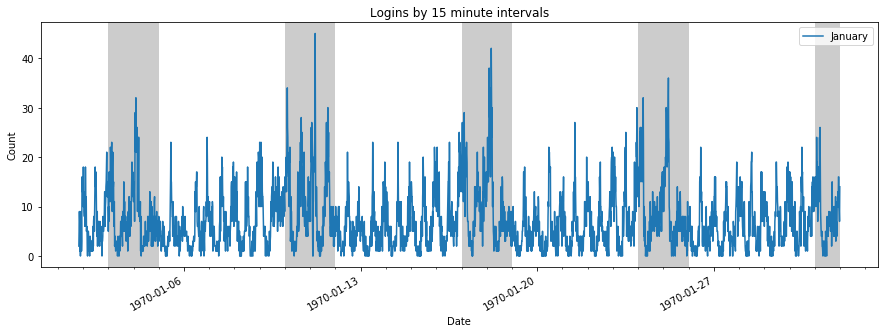

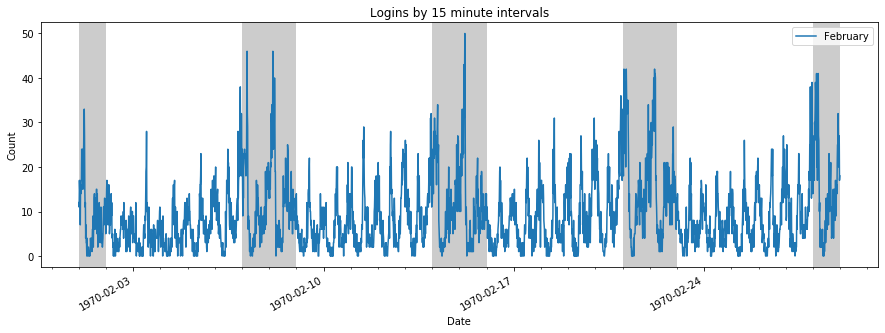

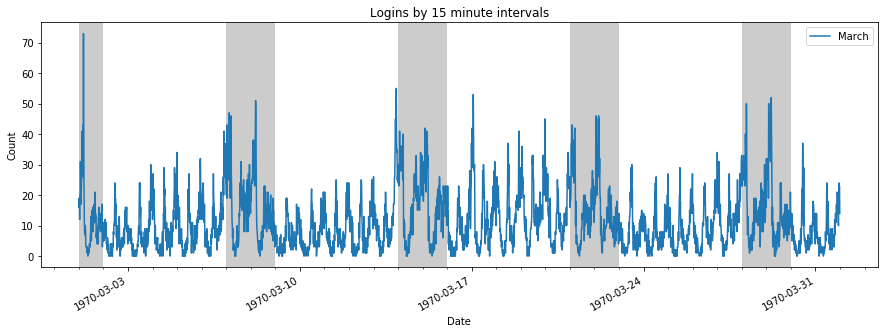

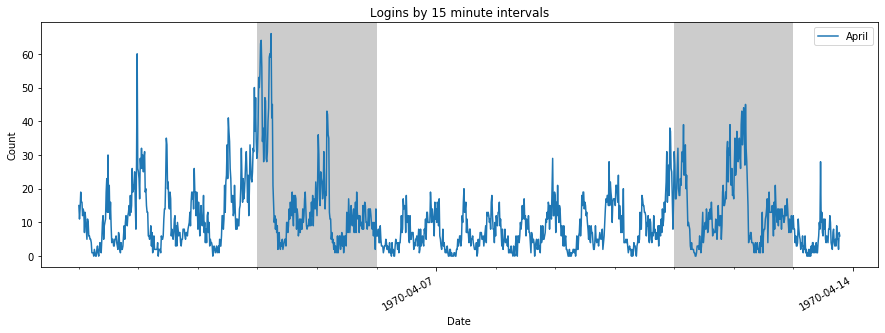

In [19]:
def find_weekend_indices(datetime_array):
    indices = []
    for i in range(len(datetime_array)):
        if datetime_array[i].weekday() >= 5:
            indices.append(i)
    return indices

def highlight_datetimes(df, indices, ax):
    i = 0
    while i < len(indices)-1:
        ax.axvspan(df.index[indices[i]], df.index[indices[i] + 1], facecolor='gray', edgecolor='none', alpha=.4)
        i += 1
        
groups = df_15m.groupby(pd.Grouper(freq='M'))
months = pd.DataFrame()
for name, group in groups:
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(group, label=name.month_name())
    weekend_indices = find_weekend_indices(group.index)
    highlight_datetimes(group, weekend_indices, ax)
    fig.autofmt_xdate()
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=(MO, TU, WE, TH, FR, SA, SU)))
    plt.title('Logins by 15 minute intervals')
    plt.legend(loc='upper right')
    plt.ylabel('Count')
    plt.xlabel('Date')
plt.show()

### Almost all the data follows a pattern of lower login counts during the work week and higher counts on the weekend. The week of March 16 is an exception. I wonder if it is Spring Break or some other event that is out of the ordinary routine enough to disrupt the pattern.   


### Look at a week close up.  

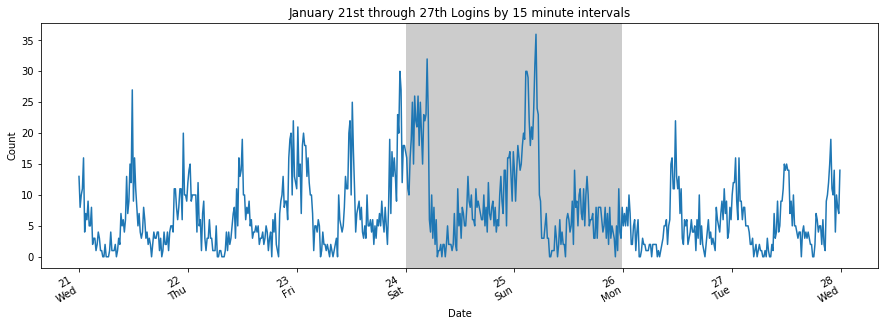

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_15m['count'].loc['1970-01-21':'1970-01-27'])
weekend_indices = find_weekend_indices(df_15m['count'].loc['1970-01-21':'1970-01-27'].index)
highlight_datetimes(df_15m['count'].loc['1970-01-21':'1970-01-27'], weekend_indices, ax)
plt.title('January 21st through 27th Logins by 15 minute intervals')
plt.ylabel('Count')
plt.xlabel('Date')
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(MO, TU, WE, TH, FR, SA, SU)))
ax.xaxis.set_major_formatter(DateFormatter('%d\n%a'))
plt.show()


### Most weekdays seem to have a peak mid-day and valleys on either side. Weekend days have a different pattern, with a peak at or just after midnight, then dropping sharply before noon.    

### Look at the average logins per day. 


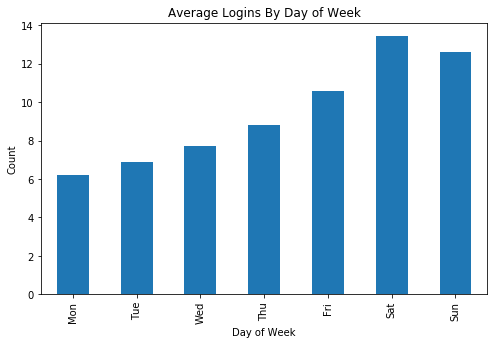

In [21]:
import calendar
fig, ax = plt.subplots(figsize=(8, 5))
df_15m['weekday'] = df_15m.index.weekday
dgroups = df_15m[['count', 'weekday']].groupby('weekday').mean().plot(kind='bar', ax=ax, legend=None)
plt.title('Average Logins By Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
labels = (list(calendar.day_abbr))
ax.set_xticklabels(labels)

plt.show()

### On average, logins start out lowest on Monday and grow through the week to a peak on Saturday, then drop a little on Sunday but both weekend days still have more average logins than any weekday. 


### Now look at the average weekday and average weekend day. 


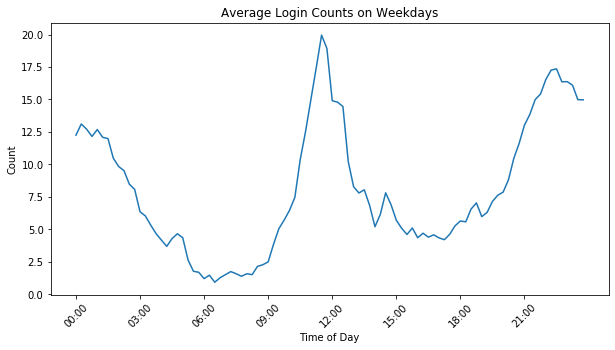

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
df_15m['time'] = df_15m.index.time
plot_data = df_15m[df_15m['weekday'].isin([0, 1, 2, 3, 4])][['count', 'time']].groupby('time').mean()
ax.plot(plot_data)
plt.ylabel('Count')
plt.xlabel('Time of Day')
plt.title('Average Login Counts on Weekdays')
dates_rng = pd.date_range("00:00", "23:59", freq="3H").time
plt.xticks(dates_rng, [dtz.strftime('%H:%M') for dtz in dates_rng], rotation=45)
plt.show()

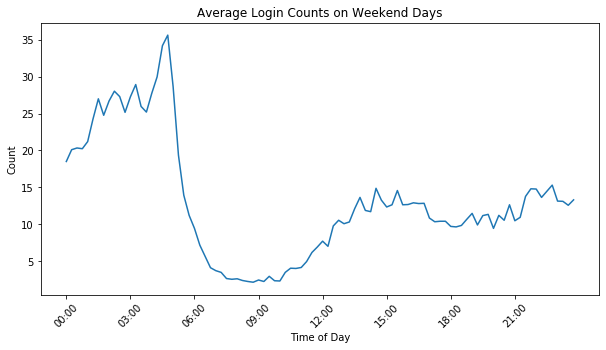

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
df_15m['time'] = df_15m.index.time
plot_data = df_15m[df_15m['weekday'].isin([5, 6])][['count', 'time']].groupby('time').mean()
ax.plot(plot_data)
plt.ylabel('Count')
plt.xlabel('Time of Day')
plt.title('Average Login Counts on Weekend Days')
dates_rng = pd.date_range("00:00", "23:59", freq="3H").time
plt.xticks(dates_rng, [dtz.strftime('%H:%M') for dtz in dates_rng], rotation=45)
plt.show()


### The average weekday has a peak around 12:00 and secondary highs at the beginning and end of the day, close to midnight. There are two dips, around mid-morning and evening.  The morning dip is lower on average.  
### Weekend days look different with most of the activity between midnight and 6:00am, then a sharp drop for several hours before climbing to about half of the earlier peak and mostly leveling off for the rest of the day. 

### These are curious times of day to have peak logins. I wonder if the timezone is set correctly? Or if the primary users are in a different timezone than the server? Or are they just night owls?

### Look at an autocorrelation plot. 

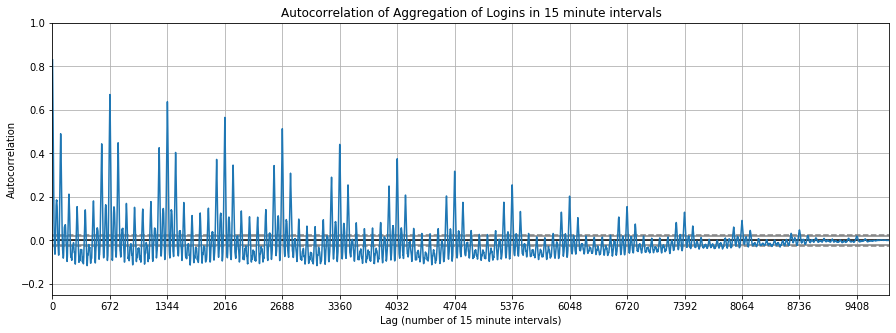

In [24]:
from pandas.plotting import autocorrelation_plot
fig = plt.figure(figsize=(15, 5))
autocorrelation_plot(df_15m['count'])
lag_weeks = [(4*24*7)* x for x in range(0, 15)]
plt.title('Autocorrelation of Aggregation of Logins in 15 minute intervals')
plt.xlabel('Lag (number of 15 minute intervals)')
plt.ylim([-0.25, 1.0])
plt.xticks(lag_weeks)
plt.show()

### The tick marks on the x axis are at exactly 1 week intervals. This shows there is a strong weekly pattern in the data. 

In [25]:
from sklearn.metrics import mean_absolute_error
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
        Source https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values", alpha=0.5)
    plt.xlabel('Date')
    plt.ylabel('Login Count')
    plt.legend(loc="upper left")
    plt.grid(True)



### Look at a 24 hour moving average to see the daily trend. 

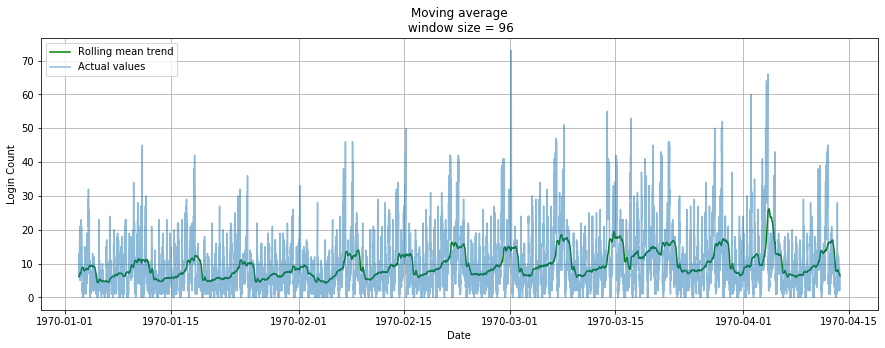

In [26]:
plotMovingAverage(df_15m['count'], 96) 

### This clearly shows the pattern of lower login counts during weekdays, climbing through the week, higher login counts on weekends, and higher login values during the week of March 16. It also shows a spike in logins around April 4 or 5.  

### Look at a longer moving average to check for trends. 

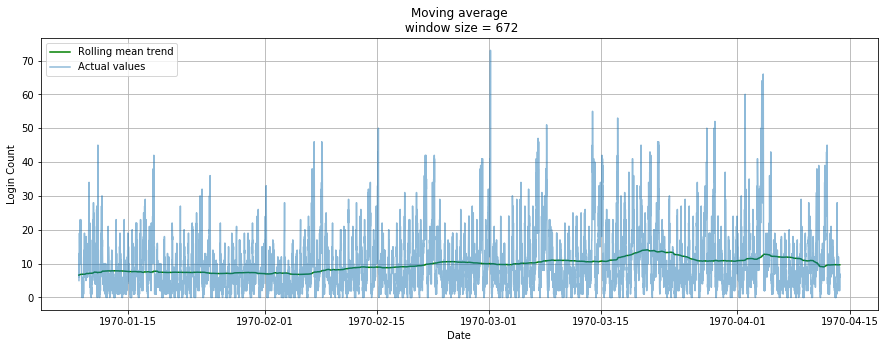

In [27]:
plotMovingAverage(df_15m['count'], 672) 

### This is a weekly moving average which shows a slow increase in average logins through February and early March. The increased logins in mid-March created a peak as did the spike in logins in early April. The trend seems to have leveled off by the end of the period with the average back to early March levels.   

### Check stationarity of the data. 

In [28]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    plt.figure(figsize=(15,5))    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'tab:cyan',
                    alpha = 0.7,
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'tab:green', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'tab:brown', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation of {}'.format(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

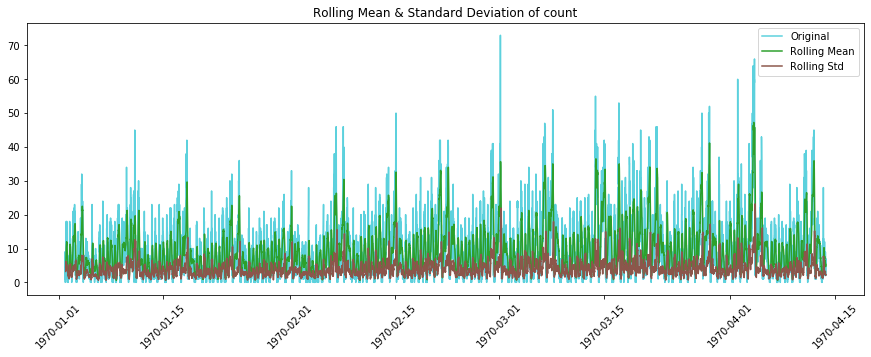

Results of Dickey-Fuller Test:
Test Statistic                -1.033853e+01
p-value                        2.723440e-18
# Lags Used                    3.800000e+01
Number of Observations Used    9.749000e+03
Critical Value (1%)           -3.431021e+00
Critical Value (5%)           -2.861837e+00
Critical Value (10%)          -2.566928e+00
dtype: float64


In [29]:
test_stationarity(df = df_15m.dropna(), ts = 'count')

### The null hypothesis is that the data has a unit root and is not stationary. The test statistic is larger than all of the critical values so we cannot reject the null hypothesis. It is likely this data is not stationary and has some time dependent structure. This is expected as the autocorrelation plot showed a strong weekly pattern. 

### Decompose the data into seasonal, trend and residual components. 

In [30]:
def plot_decomposition(df, ts, trend, seasonal, residual):
  """
  Plot time series data
  """
  f, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15, 15), sharex = True)

  ax1.plot(df[ts], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  # Show graph
  plt.suptitle('Trend, Seasonal, and Residual Decomposition of Login Count', 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
  plt.show()
  plt.close()
  
  return

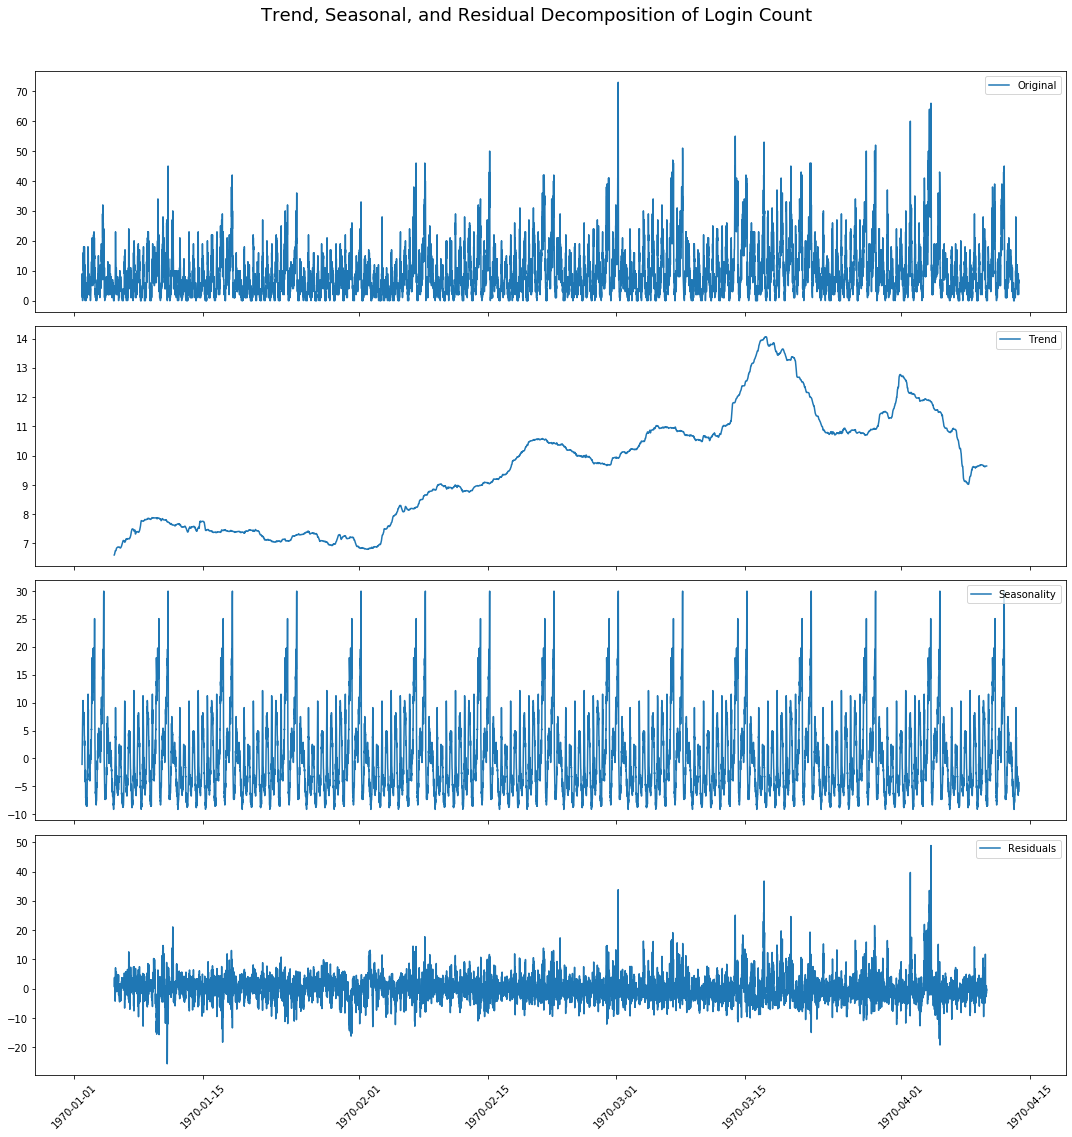

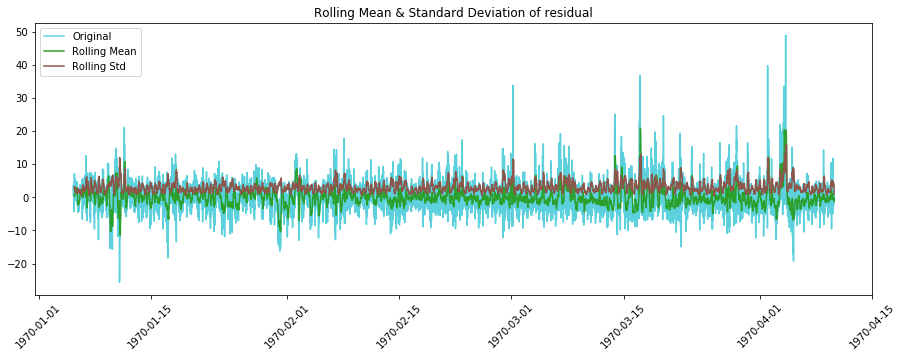

Results of Dickey-Fuller Test:
Test Statistic                  -19.975703
p-value                           0.000000
# Lags Used                       8.000000
Number of Observations Used    9107.000000
Critical Value (1%)              -3.431068
Critical Value (5%)              -2.861857
Critical Value (10%)             -2.566939
dtype: float64


In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_15m['count'], model='additive', period = 672)

df_15m.loc[:,'trend'] = decomposition.trend
df_15m.loc[:,'seasonal'] = decomposition.seasonal
df_15m.loc[:,'residual'] = decomposition.resid

plot_decomposition(df = df_15m, 
                   ts = 'count', 
                   trend = 'trend',
                   seasonal = 'seasonal', 
                   residual = 'residual')

test_stationarity(df = df_15m.dropna(), ts = 'residual')

### The test statistic is now much lower than all of the reported critical values. We can reject the null hypothesis for the residual and conclude it is stationary.  

### The time dependent structures have been identified in the seasonality and trend components.   

### This trend is slighly different than the moving weekly average in that the increase in logins begins around February 1st. We do still see the peaks during the week of March 15 and in early April, with the trend line back down to early March level by the end of the period.   

### This seasonality component does reinforce a strong weekly pattern with much higher peaks on the weekends and usage cycling once or twice each day. 

## Part 2: Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.  

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?  

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:  

  a. how you will implement the experiment  
  b. what statistical test(s) you will conduct to verify the significance of the observation  
  c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Response:
1. As the goal of the operations managers is to encourage driver partners to be available in both cities, I would choose the proportion of rides that result in a toll charge compared to the total number of rides. Measuring a change in this statistic will indicate whether or not driver partners are actually crossing the toll bridge more often to pick up riders.  
  
    That said, I would also measure average profit per ride as it will not help the company if the cost of reimbursing toll fees results in a lower profit.  
    
    
2.   a. Randomly select a portion of the drivers in each city, about 10-20% of the toal drivers. Divide the drivers randomly into two groups.   
        Group A will be the control and not be reimbursed toll fees.   
        Group B will be the test group and will be reimbursed toll fees.   
    
        Run the test for a number of weeks. We need to make the test period even multiples of weeks to avoid bias from the different activity patterns on weekdays and weekends. We need the test period to run long enough to get a big enough sample to be confident our result is representative of long term operations. We should avoid testing during extended holiday seasons. Depending on the volume of rides, perhaps 2-4 weeks would be appropriate.  
    
      b. Use a two-sided t-test on the proportions to determine whether or not there is a statistically significant change.   
        The null hypothesis would be that there is no change in the proportion of rides resulting in a toll charge.  
        The alternate hypothesis is that the test group has a different proportion than the control group.  
    
        I use the two-sided t-test to avoid an increase in type I error in a one-sided test that only looks for the proportion being greater in the test group. Also, we need to know whether the proportion is less in the test group even though we don't expect that to happen.  
        
        I would suggest a significance level of .05, which would correspond to .025 on each end of the test. I would report the 95% confidence interval of the difference in proportion so we know whether the test group has a higher or lower proportion than the control if they are not equal.   
           
      c. I would report the results of the t-test, showing whether we had enough evidence to reject the null hypothesis.  
     I would report the confidence interval of the difference of proportions and explain to them we have a 95% probability of the actual difference falling between these values.  
     
     I would use the same process to analyze the difference in mean profit per ride to see if there was a statistically significant change with the toll reimbursements.  
     
     I would explain that with a significance level of .05, the values we measure have a 5% chance of happening due to random chance and having nothing to do with the toll reimbursement.  
      

### Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we  consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.  

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.  

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.  

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?  

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.  

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).  

Data description:  
● city: city this user signed up in  
● phone: primary device for this user  
● signup_date: date of account registration; in the form ‘YYYY MM DD’  
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’  
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup  
● avg_rating_by_driver: the rider’s average rating over all of their trips  
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips  
● surge_pct: the percent of trips taken with surge multiplier > 1  
● avg_surge: The average surge multiplier over all of this user’s trips  
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up  
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise  
● weekday_pct: the percent of the user’s trips occurring during a weekday  

In [32]:
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### 1. Cleaning, EDA, Visualization. 

**Check for nulls, outliers and data that does not make sense.**   
**Check for correlation with target, correlation among features.**

In [33]:
with open('ultimate_data_challenge.json') as ult_file:
    ult_data = json.load(ult_file)
ult_df = pd.DataFrame(ult_data)   
ult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


**There are null ratings of riders and drivers, as well as phones.**  

As the missing ratings of the drivers are around 15% of our data, we probably want to fill those nulls somehow rather than dropping the rows. 

In [34]:
ult_df.last_trip_date = pd.to_datetime(ult_df.last_trip_date)
ult_df.signup_date = pd.to_datetime(ult_df.signup_date)

In [35]:
ult_df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [36]:
ult_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


**Avg_dist of 161 miles in first 30 days seems excessive. Also avg_dist of 0.0 looks odd.**  

**125 trips in first 30 days is also odd. That would average out to just over 4 trips per day, every day.**  

**Avg_surge of 8.0 seems rather large, as does surge_pct of 100.**  



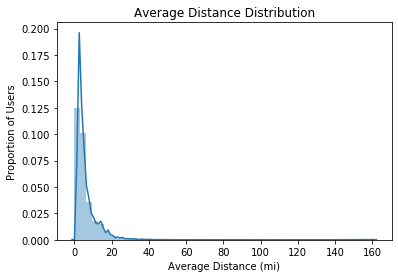

In [37]:
sns.distplot(ult_df['avg_dist'])
plt.title('Average Distance Distribution')
plt.xlabel('Average Distance (mi)')
plt.ylabel('Proportion of Users')
plt.show()

In [38]:
ult_df[ult_df.avg_dist == 0.0]['avg_dist'].count()

150

**Perhaps mileage is rounded so trips under 0.5 miles are recorded as 0.0. If so, these users make only very short trips. Alternatively, this is missing/bad data.**

In [39]:
ult_df[(ult_df.avg_dist < 0.5) & (ult_df.avg_dist > 0.0)]['avg_dist'].head()

563     0.08
857     0.42
944     0.47
1020    0.40
1196    0.49
Name: avg_dist, dtype: float64

In [40]:
ult_df[(ult_df.avg_dist == 0) & (ult_df.trips_in_first_30_days != 0)][['avg_dist', 
                                                'trips_in_first_30_days']].groupby(['trips_in_first_30_days']).count()

,avg_dist
trips_in_first_30_days,
1,92
2,2


**Avg_dist == 0 is likely bad data where trips_in_first_30_days > 0. It is not being rounded as evidenced by the values below 0.5 for many users.**

In [41]:
ult_df[ult_df.avg_dist > 50].sort_values('avg_dist', ascending=False)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
20701,Astapor,0,2014-01-25,NaN,1.0,2014-06-26,Android,0.0,False,100.0,160.96,NaN
534,King's Landing,0,2014-01-04,NaN,1.0,2014-03-09,None,0.0,False,0.0,129.89,5.0
1302,Winterfell,1,2014-01-30,5.0,1.0,2014-01-30,iPhone,0.0,False,100.0,79.69,5.0
22290,Astapor,0,2014-01-12,5.0,1.0,2014-06-26,iPhone,0.0,True,100.0,79.34,5.0
47595,King's Landing,0,2014-01-25,5.0,1.0,2014-06-09,iPhone,0.0,True,0.0,77.13,5.0
36625,Astapor,2,2014-01-19,5.0,1.0,2014-01-22,iPhone,0.0,False,100.0,73.88,3.0
22096,Astapor,0,2014-01-17,NaN,1.0,2014-05-01,iPhone,0.0,True,100.0,72.20,5.0
1493,Astapor,1,2014-01-26,5.0,1.0,2014-01-27,iPhone,0.0,False,100.0,72.08,5.0
19197,Astapor,2,2014-01-17,4.7,1.0,2014-05-14,iPhone,0.0,True,100.0,71.38,5.0
42835,Winterfell,0,2014-01-10,5.0,1.0,2014-06-28,Android,0.0,False,100.0,70.48,5.0


**We have a data integrity problem. There are many users who have 0 trips in first 30 days, yet their average distance of trips in the first 30 days is non-zero. The trip count is likely bad in these cases. This issue affects almost a third of the dataset**

In [42]:
ult_df[(ult_df['avg_dist'] > 0) & (ult_df['trips_in_first_30_days'] == 0)]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0
17,King's Landing,0,2014-01-12,3.9,1.00,2014-07-01,iPhone,0.0,True,95.2,2.38,4.8
19,King's Landing,0,2014-01-02,5.0,1.17,2014-06-03,iPhone,33.3,False,66.7,12.08,5.0
22,Winterfell,0,2014-01-24,NaN,1.00,2014-05-02,iPhone,0.0,False,100.0,11.47,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49986,Winterfell,0,2014-01-21,4.0,1.00,2014-05-23,Android,0.0,False,100.0,0.52,5.0
49991,Winterfell,0,2014-01-08,5.0,1.25,2014-06-29,iPhone,100.0,False,0.0,1.06,5.0
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0


In [43]:
ult_df[ult_df.trips_in_first_30_days > 45][['avg_dist', 'trips_in_first_30_days']].sort_values('trips_in_first_30_days', 
                                                                                        ascending=False)

,avg_dist,trips_in_first_30_days
18514,2.02,125
99,2.86,73
3030,2.32,71
29070,1.45,63
48804,2.30,58
45489,3.65,56
36917,3.51,56
29043,3.39,55
17942,3.27,55
33488,2.91,54


**We have a number of riders with large trip counts. At the same time, 125 is an extreme outlier that may affect our results.**

In [44]:
ult_df[ult_df.avg_surge > 4.0][['surge_pct', 'avg_surge', 'city']].sort_values('avg_surge', ascending=False)

,surge_pct,avg_surge,city
13861,100.0,8.00,Winterfell
30477,100.0,5.75,Winterfell
21894,100.0,5.00,Winterfell
19191,100.0,5.00,Winterfell
47052,100.0,5.00,Winterfell
2817,100.0,5.00,Winterfell
49383,100.0,5.00,Winterfell
1405,100.0,4.75,Winterfell
21742,100.0,4.50,Winterfell
15334,100.0,4.50,Winterfell


**This looks ok. Perhaps Winterfell (or part of it) is a high traffic/high demand area and these users only request rides during surge periods.**  

**The 8.0 avg_surge is an outlier that may affect our results.**

In [45]:
ult_df[ult_df.surge_pct == 100][['avg_surge', 'surge_pct', 'city']].groupby(['city', 'avg_surge']).count()

surge_pct
city       avg_surge           
Astapor    1.25             149
           1.38               5
           1.50             105
           1.63               6
           1.67               1
...                         ...
Winterfell 4.50               4
           4.75               1
           5.00               5
           5.75               1
           8.00               1

[62 rows x 1 columns]

**This looks ok. Lots of riders who only ride during high demand periods.**

In [46]:
ult_df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [47]:
ult_df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

### Before modeling, we need to address the missing/bad data and create target.  

1. Null ratings: impute to fill nulls. 
2. Null phone types: impute to fill nulls. 
3. Bad 0 values in avg_dist, trips_in_first_30_days: change to null then impute to fill nulls. 
4. Outliers in avg_surge, trips_in_first_30_days: drop as they are only two users and could significantly affect our model.
5. Target is boolean last_trip_date is in last 30 days of data. 

In [48]:
# Leave out the two outliers. 
clean_df = ult_df[(ult_df.avg_surge < 8)]
clean_df = clean_df[clean_df.trips_in_first_30_days < 125]

In [49]:
ult_df.shape, clean_df.shape

((50000, 12), (49998, 12))

In [50]:
clean_df[(clean_df.avg_dist == 0) & (clean_df.trips_in_first_30_days > 0)]['avg_dist'].count()

94

In [51]:
clean_df.loc[((clean_df.avg_dist == 0) & (clean_df.trips_in_first_30_days > 0)), 'avg_dist'] = None

In [52]:
clean_df[(clean_df.avg_dist == 0) & (clean_df.trips_in_first_30_days > 0)]['avg_dist'].count()

0

In [53]:
clean_df[(clean_df.trips_in_first_30_days == 0) & (clean_df.avg_dist > 0)]['trips_in_first_30_days'].count()

15334

In [54]:
clean_df.loc[((clean_df.trips_in_first_30_days == 0) & (clean_df.avg_dist > 0)), 'trips_in_first_30_days'] = None

In [55]:
clean_df[(clean_df.avg_dist == 0) & (clean_df.trips_in_first_30_days > 0)]['avg_dist'].count()

0

**Convert categoricals to numeric, dates to days since jan 1 for imputing and modeling.**

In [56]:
phone_int = {"Android": 1, "iPhone": 2, None: None}
city_int = {"Astapor": 1, "King\'s Landing": 2, "Winterfell":3}

In [57]:
clean_df['phone_int'] = clean_df.apply(lambda row: phone_int[row['phone']], axis=1)
print('phone_int: \n{}\nphone: \n{}'.format(clean_df['phone_int'].value_counts(), clean_df['phone'].value_counts()))

phone_int: 
2.0    34580
1.0    15022
Name: phone_int, dtype: int64
phone: 
iPhone     34580
Android    15022
Name: phone, dtype: int64


In [58]:
clean_df['city_int'] = clean_df.apply(lambda row: city_int[row['city']], axis=1)
print('city_int: \n{}\ncity: \n{}'.format(clean_df['city_int'].value_counts(), clean_df['city'].value_counts()))

city_int: 
3    23335
1    16534
2    10129
Name: city_int, dtype: int64
city: 
Winterfell        23335
Astapor           16534
King's Landing    10129
Name: city, dtype: int64


In [59]:
jan_1 = datetime.strptime('Jan 1 2014', '%b %d %Y')
clean_df['signup_days_since_jan_1'] = clean_df.apply(lambda row: (row['signup_date'] - jan_1).days, axis=1)
clean_df['last_trip_days_since_jan_1'] = clean_df.apply(lambda row: (row['last_trip_date'] - jan_1).days, axis=1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49998 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   city                        49998 non-null  object        
 1   trips_in_first_30_days      34664 non-null  float64       
 2   signup_date                 49998 non-null  datetime64[ns]
 3   avg_rating_of_driver        41876 non-null  float64       
 4   avg_surge                   49998 non-null  float64       
 5   last_trip_date              49998 non-null  datetime64[ns]
 6   phone                       49602 non-null  object        
 7   surge_pct                   49998 non-null  float64       
 8   ultimate_black_user         49998 non-null  bool          
 9   weekday_pct                 49998 non-null  float64       
 10  avg_dist                    49904 non-null  float64       
 11  avg_rating_by_driver        49797 non-null  float64   

In [60]:
clean_df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

**Assume this data was pulled on 7/1/14 and use that as the basis for creating the 'active' labels for modeling. This fits as we're looking for the fraction of users active after 6 months and our signup period begins 1/1/14.**  

In [61]:
last_date = ult_df['last_trip_date'].max()
clean_df['active'] = clean_df.apply(lambda row: (last_date - row['last_trip_date']).days <= 30, axis=1)

In [62]:
clean_df[['last_trip_date', 'active']].head(10)

,last_trip_date,active
0,2014-06-17,True
1,2014-05-05,False
2,2014-01-07,False
3,2014-06-29,True
4,2014-03-15,False
5,2014-06-06,True
6,2014-01-25,False
7,2014-01-29,False
8,2014-02-01,False
9,2014-01-05,False


### 1. Fraction of users who are active after 6 months.  

In [63]:
round(clean_df[clean_df['active']]['active'].count()/clean_df['active'].count(), 3)

0.376

In [64]:
clean_imp = clean_df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'city_int', 
                      'last_trip_days_since_jan_1', 'phone_int', 'signup_days_since_jan_1', 'surge_pct', 
                      'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct', 'active']]

In [65]:
clean_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49998 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_dist                    49904 non-null  float64
 1   avg_rating_by_driver        49797 non-null  float64
 2   avg_rating_of_driver        41876 non-null  float64
 3   avg_surge                   49998 non-null  float64
 4   city_int                    49998 non-null  int64  
 5   last_trip_days_since_jan_1  49998 non-null  int64  
 6   phone_int                   49602 non-null  float64
 7   signup_days_since_jan_1     49998 non-null  int64  
 8   surge_pct                   49998 non-null  float64
 9   trips_in_first_30_days      34664 non-null  float64
 10  ultimate_black_user         49998 non-null  bool   
 11  weekday_pct                 49998 non-null  float64
 12  active                      49998 non-null  bool   
dtypes: bool(2), float64(8), int64(3

In [66]:
clean_imp.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_int,last_trip_days_since_jan_1,phone_int,signup_days_since_jan_1,surge_pct,trips_in_first_30_days,weekday_pct
count,49904.000000,49797.000000,41876.000000,49998.000000,49998.000000,49998.000000,49602.000000,49998.000000,49998.000000,34664.000000,49998.000000
mean,5.807822,4.778153,4.601636,1.074624,2.136025,108.335513,1.697149,15.545282,8.847602,3.282483,60.925081
std,5.707266,0.446660,0.617099,0.220173,0.882567,61.717485,0.459496,8.753878,19.955031,4.124249,37.081800
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.430000,4.700000,4.300000,1.000000,1.000000,44.000000,1.000000,8.000000,0.000000,1.000000,33.300000
50%,3.890000,5.000000,4.900000,1.000000,2.000000,127.000000,2.000000,16.000000,0.000000,2.000000,66.700000
75%,6.950000,5.000000,5.000000,1.050000,3.000000,168.000000,2.000000,23.000000,8.600000,4.000000,100.000000
max,160.960000,5.000000,5.000000,5.750000,3.000000,181.000000,2.000000,30.000000,100.000000,73.000000,100.000000


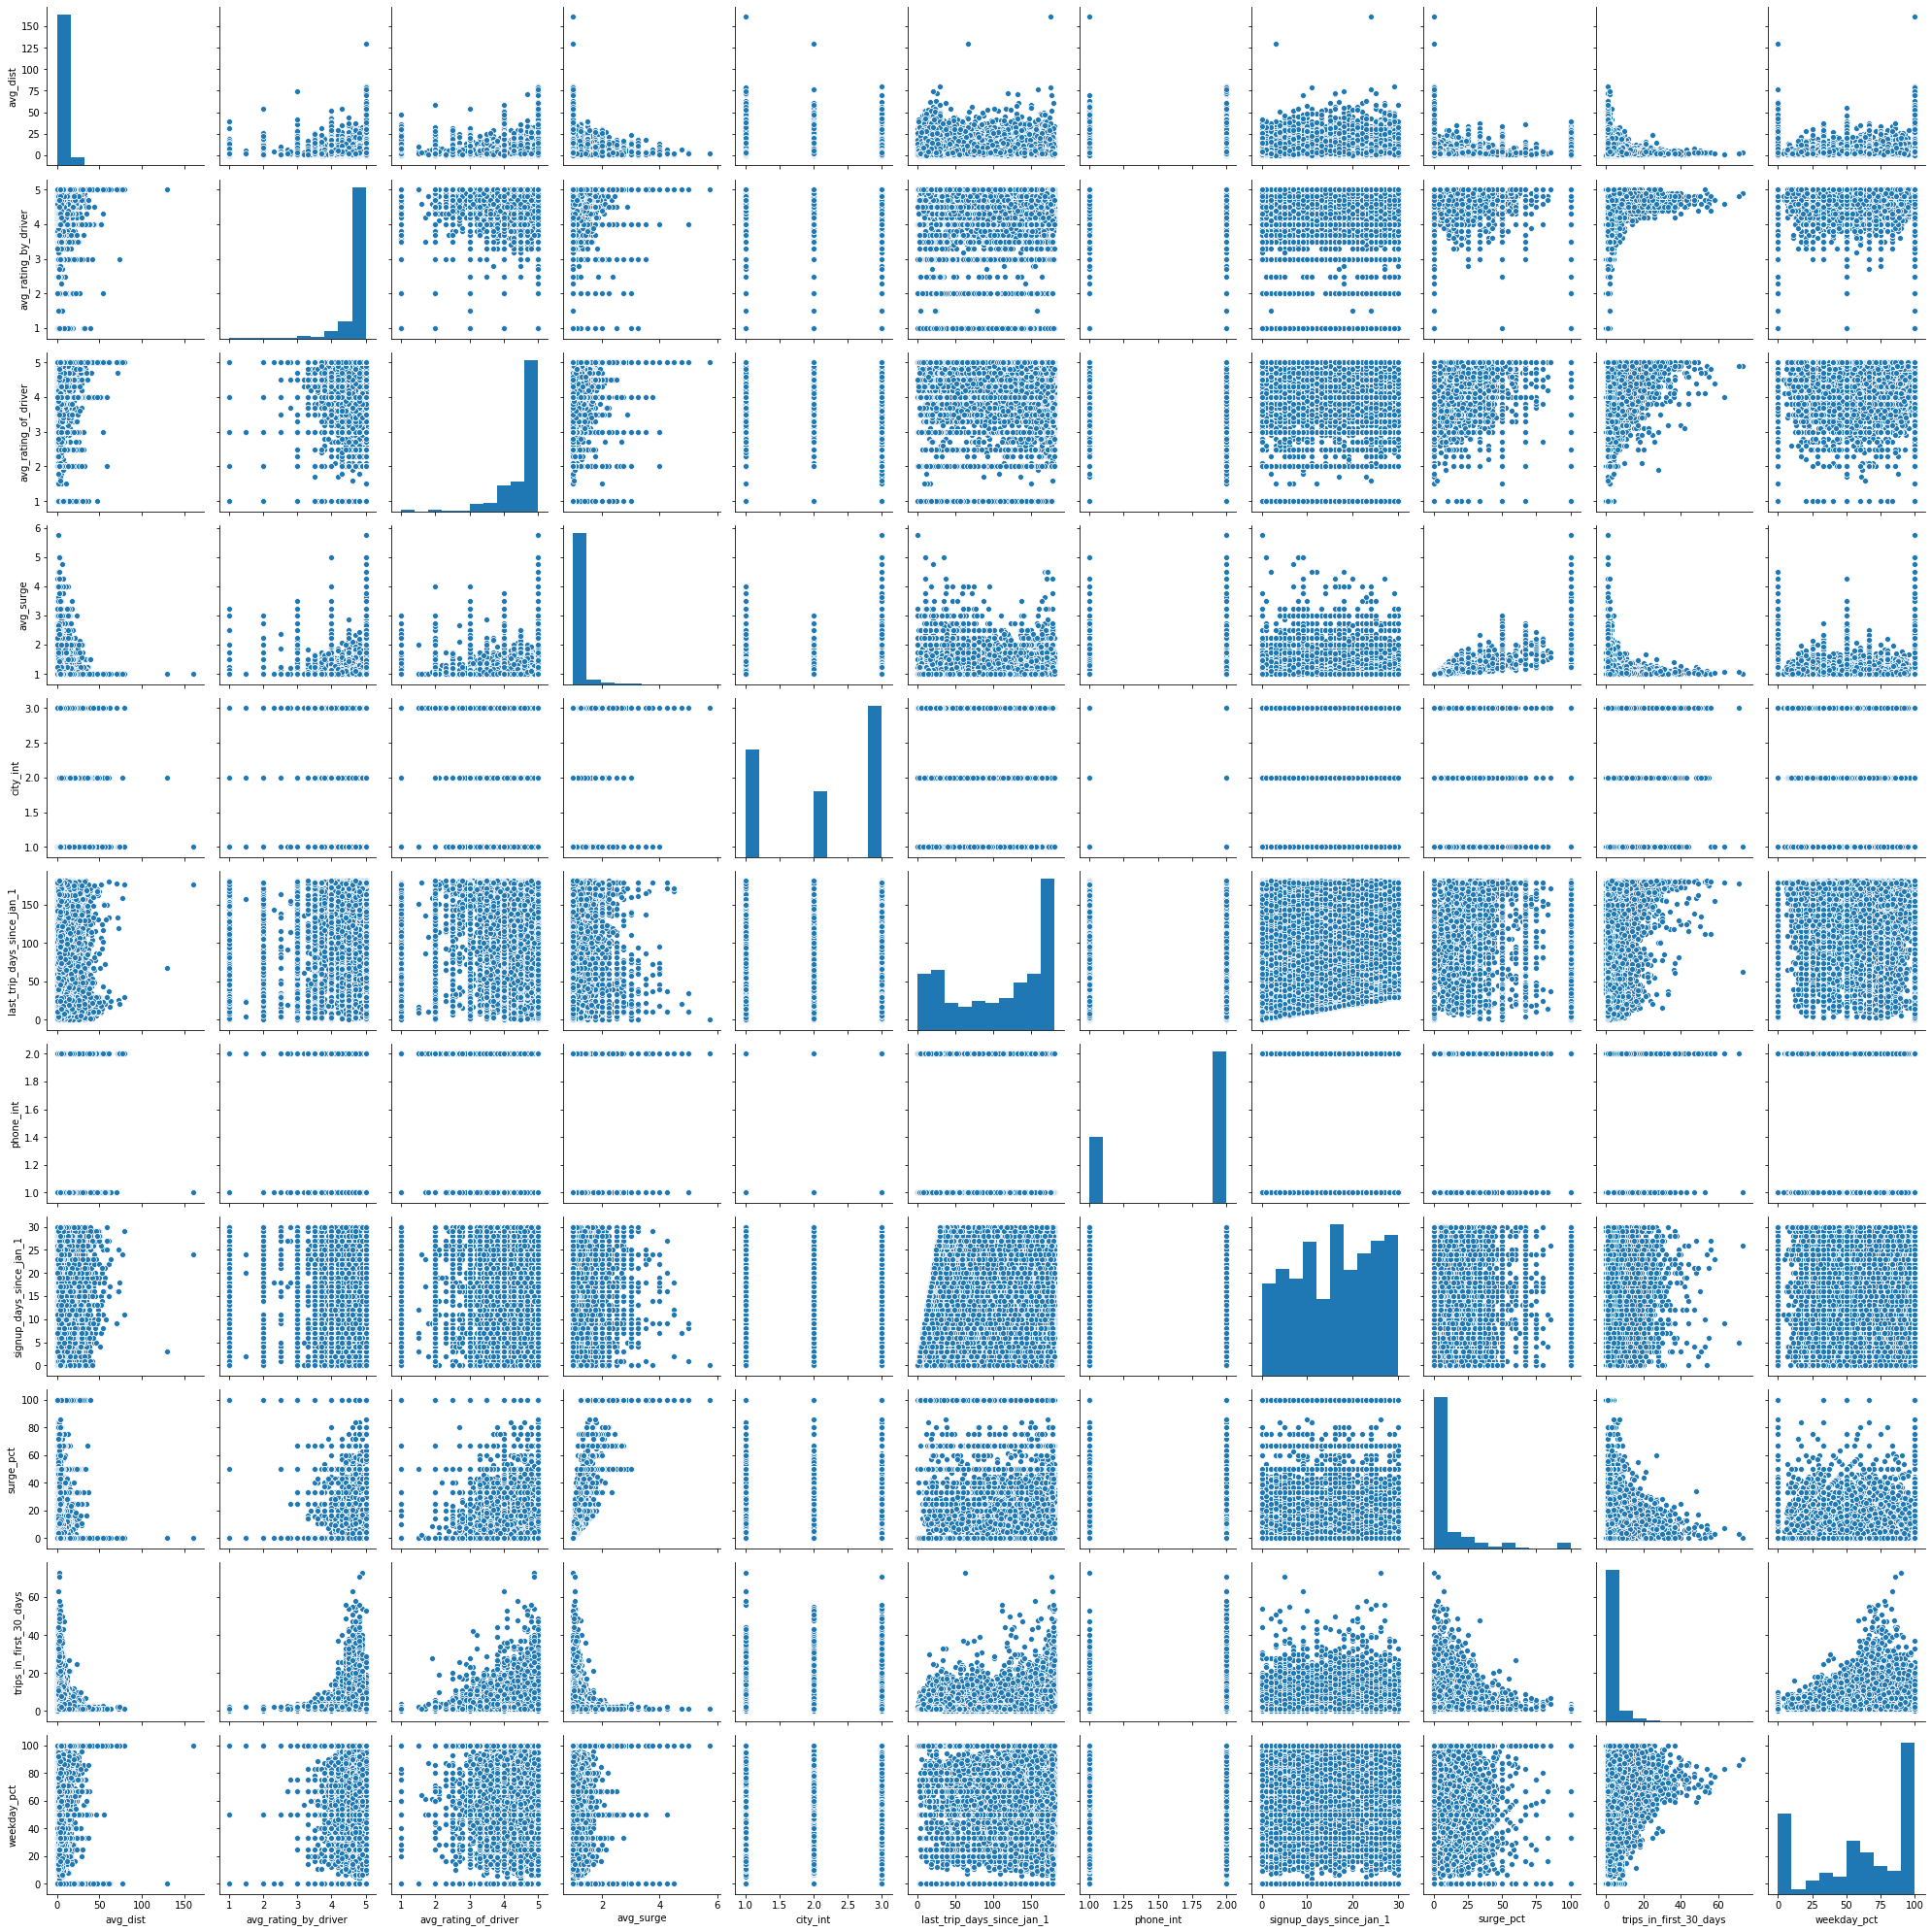

In [67]:
# Drop boolean columns before plotting as they throw errors. 
sns.pairplot(clean_imp.drop(columns=['ultimate_black_user', 'active']))
plt.show()

**Split data before imputing missing data to avoid leaking test into train. Fit only on training data, then transform test data.**

In [68]:
y = clean_imp['active']
X = clean_imp.drop(columns=['active'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

**Impute missing values, then check statistics.**

In [69]:
imp = IterativeImputer(random_state=0)
X_train_filled = pd.DataFrame(imp.fit_transform(X_train))
X_test_filled = pd.DataFrame(imp.transform(X_test))

In [70]:
X_train_filled.columns = X.columns
X_train_filled.index = X_train.index
X_train_filled.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_int,last_trip_days_since_jan_1,phone_int,signup_days_since_jan_1,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
count,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000
mean,5.798188,4.777090,4.604331,1.074364,2.137122,108.300846,1.696697,15.552574,8.855166,3.375884,0.376422,60.847486
std,5.641325,0.448245,0.564828,0.217495,0.882712,61.682522,0.457903,8.744020,20.000245,3.437826,0.484495,37.124033
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-9.300216,0.000000,0.000000
25%,2.440000,4.700000,4.500000,1.000000,1.000000,44.000000,1.000000,8.000000,0.000000,1.000000,0.000000,33.300000
50%,3.900000,5.000000,4.800000,1.000000,2.000000,127.000000,2.000000,16.000000,0.000000,2.850238,0.000000,66.700000
75%,6.950000,5.000000,5.000000,1.050000,3.000000,168.000000,2.000000,23.000000,8.500000,4.000261,1.000000,100.000000
max,129.890000,5.050280,5.000000,5.000000,3.000000,181.000000,2.000000,30.000000,100.000000,73.000000,1.000000,100.000000


In [71]:
clean_imp['avg_rating_by_driver'].value_counts().sort_index(ascending=False)

5.0    28507
4.9     3094
4.8     4536
4.7     3330
4.6     2078
4.5     2424
4.4      860
4.3     1018
4.2      342
4.1      125
4.0     1914
3.9       41
3.8      111
3.7      195
3.6       19
3.5      199
3.4        5
3.3       47
3.2        2
3.0      602
2.8        3
2.7        2
2.5       31
2.3        1
2.0      126
1.5        4
1.0      181
Name: avg_rating_by_driver, dtype: int64

In [72]:
X_train_filled.phone_int.value_counts().head()

2.000000    24197
1.000000    10527
1.599490        1
1.743521        1
1.633452        1
Name: phone_int, dtype: int64

**Imputer assigned ratings above max of 5.0. Reset those to 5.0. Most ratings are 5.0 anyway.**  
**Also assigned float values to phone_int. Valid values are 1 and 2. Round values and see how that looks.**

In [73]:
X_train_filled[X_train_filled['avg_rating_by_driver'] > 5.0]['avg_rating_by_driver']

41853    5.05028
Name: avg_rating_by_driver, dtype: float64

In [74]:
X_train_filled[X_train_filled['avg_rating_of_driver'] > 5.0]['avg_rating_of_driver']

Series([], Name: avg_rating_of_driver, dtype: float64)

In [75]:
X_train_filled.loc[X_train_filled['avg_rating_by_driver'] > 5.0, 'avg_rating_by_driver'] = 5.0
X_train_filled.loc[X_train_filled['avg_rating_of_driver'] > 5.0, 'avg_rating_of_driver'] = 5.0
X_train_filled = X_train_filled.round({'phone_int': 0})
X_train_filled.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_int,last_trip_days_since_jan_1,phone_int,signup_days_since_jan_1,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
count,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000
mean,5.798188,4.777088,4.604331,1.074364,2.137122,108.300846,1.699211,15.552574,8.855166,3.375884,0.376422,60.847486
std,5.641325,0.448244,0.564828,0.217495,0.882712,61.682522,0.458607,8.744020,20.000245,3.437826,0.484495,37.124033
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-9.300216,0.000000,0.000000
25%,2.440000,4.700000,4.500000,1.000000,1.000000,44.000000,1.000000,8.000000,0.000000,1.000000,0.000000,33.300000
50%,3.900000,5.000000,4.800000,1.000000,2.000000,127.000000,2.000000,16.000000,0.000000,2.850238,0.000000,66.700000
75%,6.950000,5.000000,5.000000,1.050000,3.000000,168.000000,2.000000,23.000000,8.500000,4.000261,1.000000,100.000000
max,129.890000,5.000000,5.000000,5.000000,3.000000,181.000000,2.000000,30.000000,100.000000,73.000000,1.000000,100.000000


In [76]:
X_train_filled.phone_int.value_counts()

2.0    24471
1.0    10527
Name: phone_int, dtype: int64

In [77]:
X_test_filled.index = X_test.index
X_test_filled.columns = X.columns
X_test_filled.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_int,last_trip_days_since_jan_1,phone_int,signup_days_since_jan_1,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,5.834239,4.780630,4.599557,1.075233,2.133467,108.416400,1.697784,15.528267,8.829953,3.393696,0.378600,61.106127
std,5.842524,0.440129,0.572066,0.226304,0.882254,61.800967,0.457399,8.777103,19.849790,3.586151,0.485054,36.983677
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-9.937714,0.000000,0.000000
25%,2.410000,4.700000,4.500000,1.000000,1.000000,44.000000,1.000000,8.000000,0.000000,1.000000,0.000000,33.300000
50%,3.880000,5.000000,4.750108,1.000000,2.000000,127.000000,2.000000,16.000000,0.000000,2.898943,0.000000,66.700000
75%,6.990000,5.000000,5.000000,1.050000,3.000000,168.000000,2.000000,23.000000,8.700000,4.011292,1.000000,100.000000
max,160.960000,5.831170,5.241528,5.750000,3.000000,181.000000,2.000000,30.000000,100.000000,71.000000,1.000000,100.000000


In [78]:
X_test_filled[X_test_filled['avg_rating_by_driver'] > 5.0]['avg_rating_by_driver']

20701    5.83117
Name: avg_rating_by_driver, dtype: float64

In [79]:
X_test_filled[X_test_filled['avg_rating_of_driver'] > 5.0]['avg_rating_of_driver']

20701    5.241528
Name: avg_rating_of_driver, dtype: float64

In [80]:
X_test_filled.loc[X_test_filled['avg_rating_by_driver'] > 5.0, 'avg_rating_by_driver'] = 5.0
X_test_filled.loc[X_test_filled['avg_rating_of_driver'] > 5.0, 'avg_rating_of_driver'] = 5.0
X_test_filled = X_test_filled.round({'phone_int':0})
X_test_filled.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_int,last_trip_days_since_jan_1,phone_int,signup_days_since_jan_1,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,5.834239,4.780574,4.599540,1.075233,2.133467,108.416400,1.700333,15.528267,8.829953,3.393696,0.378600,61.106127
std,5.842524,0.440049,0.572051,0.226304,0.882254,61.800967,0.458127,8.777103,19.849790,3.586151,0.485054,36.983677
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-9.937714,0.000000,0.000000
25%,2.410000,4.700000,4.500000,1.000000,1.000000,44.000000,1.000000,8.000000,0.000000,1.000000,0.000000,33.300000
50%,3.880000,5.000000,4.750108,1.000000,2.000000,127.000000,2.000000,16.000000,0.000000,2.898943,0.000000,66.700000
75%,6.990000,5.000000,5.000000,1.050000,3.000000,168.000000,2.000000,23.000000,8.700000,4.011292,1.000000,100.000000
max,160.960000,5.000000,5.000000,5.750000,3.000000,181.000000,2.000000,30.000000,100.000000,71.000000,1.000000,100.000000


In [81]:
X_test_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 30521 to 24905
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_dist                    15000 non-null  float64
 1   avg_rating_by_driver        15000 non-null  float64
 2   avg_rating_of_driver        15000 non-null  float64
 3   avg_surge                   15000 non-null  float64
 4   city_int                    15000 non-null  float64
 5   last_trip_days_since_jan_1  15000 non-null  float64
 6   phone_int                   15000 non-null  float64
 7   signup_days_since_jan_1     15000 non-null  float64
 8   surge_pct                   15000 non-null  float64
 9   trips_in_first_30_days      15000 non-null  float64
 10  ultimate_black_user         15000 non-null  float64
 11  weekday_pct                 15000 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


**Convert categorical nominal features to dummies. Drop first as we're using permutation importance which yield bad results with multicollinear features.**

In [82]:
X_train_dummy = pd.get_dummies(X_train_filled, columns=['city_int', 'phone_int', 'ultimate_black_user'], drop_first=True)
X_train_dummy.index = X_train.index
X_test_dummy = pd.get_dummies(X_test_filled, columns=['city_int', 'phone_int', 'ultimate_black_user'], drop_first=True)
X_test_dummy.index = X_test.index

In [83]:
X_train_dummy.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_days_since_jan_1,signup_days_since_jan_1,surge_pct,trips_in_first_30_days,weekday_pct,city_int_2.0,city_int_3.0,phone_int_2.0,ultimate_black_user_1.0
44212,7.76,4.3,5.0,1.00,137.0,26.0,0.0,1.00000,33.3,0,0,0,0
32738,2.57,4.5,4.9,1.13,179.0,24.0,10.0,4.00000,25.0,0,1,0,0
9921,2.30,4.5,5.0,1.00,169.0,15.0,0.0,1.00000,100.0,0,1,1,1
42634,3.07,5.0,5.0,1.25,20.0,19.0,100.0,1.00000,100.0,0,1,1,0
15963,3.14,5.0,5.0,1.00,49.0,6.0,0.0,3.02411,100.0,0,1,1,0


**Scale numerical features.**

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cont_cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'last_trip_days_since_jan_1', 
             'signup_days_since_jan_1', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
scaled_X_train_cont = pd.DataFrame(scaler.fit_transform(X_train_filled[cont_cols]))
scaled_X_test_cont = pd.DataFrame(scaler.transform(X_test_filled[cont_cols]))
scaled_X_train_cont.columns = cont_cols
scaled_X_train_cont.index = X_train.index
scaled_X_test_cont.columns = cont_cols
scaled_X_test_cont.index = X_test.index

**Concatenate scaled and dummy features into one dataframe.**

In [85]:
#X_train_dummy = X_train_dummy[['city_int_1.0', 'city_int_2.0', 'city_int_3.0', 'phone_int_1.0', 'phone_int_2.0', 
#                               'ultimate_black_user_0.0', 'ultimate_black_user_1.0']]
#X_test_dummy = X_test_dummy[['city_int_1.0', 'city_int_2.0', 'city_int_3.0', 'phone_int_1.0', 'phone_int_2.0', 
#                             'ultimate_black_user_0.0', 'ultimate_black_user_1.0']]
X_train_dummy = X_train_dummy[['city_int_2.0', 'city_int_3.0', 'phone_int_2.0', 'ultimate_black_user_1.0']]
X_test_dummy = X_test_dummy[['city_int_2.0', 'city_int_3.0', 'phone_int_2.0', 'ultimate_black_user_1.0']]
X_train_processed = pd.concat([scaled_X_train_cont, X_train_dummy],axis='columns')
X_test_processed = pd.concat([scaled_X_test_cont, X_test_dummy],axis='columns')

**Look at feature correlation with target and other features.**

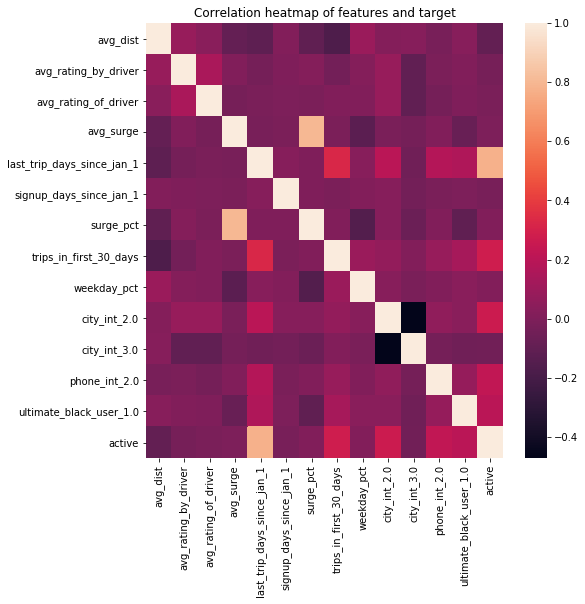

In [86]:
# calculate the correlation matrix of the processed data. 
corr_df = pd.concat([X_train_processed, y_train], axis=1)
corr = corr_df.corr()

# plot the heatmap
fig = plt.figure(figsize=(8, 8)) 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title('Correlation heatmap of features and target')
plt.show()

**This heatmap suggests that only one feature is strongly correlated to the target and that is the column that was used to calculate the target. Drop that column from the feature set as it would not be appropriate to model with a feature that is used to define the target. Several features have a low to moderate correlation and some appear not correlated at all.**  

**Surge_pct and avg_surge are pretty strongly correlated. Drop one of those columns.**  


In [87]:
X_train_processed = X_train_processed.drop(columns=['last_trip_days_since_jan_1', 'avg_surge']).to_numpy()

In [88]:
X_test_processed = X_test_processed.drop(columns=['last_trip_days_since_jan_1', 'avg_surge']).to_numpy()

In [89]:
X_train_processed.shape, y_train.shape

((34998, 11), (34998,))

In [90]:
X_test_processed.shape, y_test.shape

((15000, 11), (15000,))

### 2. Build a model. 

Start simple and easy to explain, increase complexity if necessary to improve the model. Logistic Regression is most simple, so that will be the first model.  
Report Precision, Recall, F1-score from test data; Feature Importance. This way we can tell if a model is any good, and what factors are important to rider retention.

Use Logistic Regression, SVM, Gradient Boosting and Naive Bayes. We'll use permutation importance to find important features for recommendations. This will work for all these models. 

**Start with Logistic Regression.**

In [91]:
clf = LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced').fit(X_train_processed, y_train)
print('Test accuracy with default hyperparameters: {}'.format(accuracy_score(clf.predict(X_test_processed), y_test)))

Test accuracy with default hyperparameters: 0.7110666666666666


In [92]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(class_weight='balanced')

# define parameter values
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.001]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train_processed, y_train)

# summarize results
print(f"Best score on training data: {grid_result.best_score_} using {grid_result.best_params_}")
model = grid_search.best_estimator_
y_pred = model.predict(X_test_processed)
print('Best score on test data: {}'.format(accuracy_score(y_pred, y_test)))

Best score on training data: 0.7254127446778111 using {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Best score on test data: 0.7213333333333334


In [93]:
from sklearn.metrics import classification_report
target_names = ['Not Active', 'Active']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Not Active       0.78      0.77      0.77      9359
      Active       0.63      0.64      0.63      5641

    accuracy                           0.72     15000
   macro avg       0.70      0.71      0.70     15000
weighted avg       0.72      0.72      0.72     15000



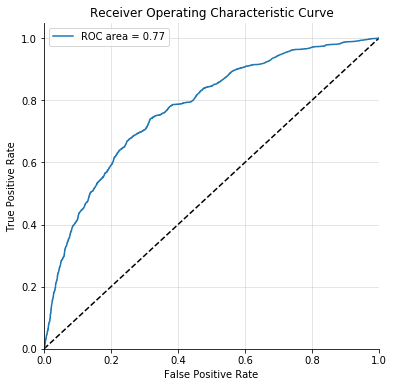

In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_df(clf, X_test, y_test, figsize=(12, 6)):
    """
    Plot roc and calculate roc_auc for binary model supporting .decision_function().
    
    Input: 
        clf: Trained  binary Classifier
        X_test: Test feature dataset to be used to get prediction probabilities for classifier
        y_test: True class values for test features in shape [n_samples,]
        figsize: Figure size of plot, optional
    """
    y_score = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1.0)
    roc_auc = auc(fpr, tpr)

    # plot roc 
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic Curve')
    ax.plot(fpr, tpr, label='ROC area = %0.2f' % (roc_auc))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_roc_df(model, X_test_processed, y_test, figsize=(6, 6))

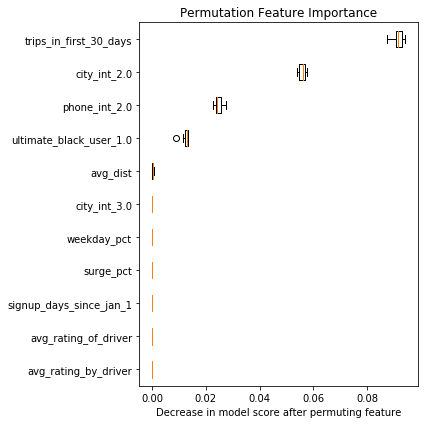

In [95]:
from sklearn.inspection import permutation_importance

def plot_top_features(clf, X, y, feature_names):
    """
    Plot feature importance of a classifier by permuting one feature at a time and measuring decrease in score. 
    Most important features will cause biggest change in performance. 
    
    Input:
            clf:             classifier 
            X_train:         feature set, np.array
            y_train:         target labels, np.array
            feature_names:   list of feature names
    """
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
    perm_sorted_idx = result.importances_mean.argsort()
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=feature_names[perm_sorted_idx])
    ax.set_title('Permutation Feature Importance')
    ax.set_xlabel('Decrease in model score after permuting feature')
    fig.tight_layout()
    plt.show()

    

X_train_processed_df = pd.concat([scaled_X_train_cont, X_train_dummy],axis='columns').drop(columns=['last_trip_days_since_jan_1', 
                                                                                             'avg_surge'])
feature_names = X_train_processed_df.columns
plot_top_features(model, X_train_processed, y_train, feature_names)

**Now try Support Vector Machine.**

In [96]:
svm = SVC(random_state=0, class_weight='balanced')
svm.fit(X_train_processed, y_train)
print('Test accuracy with default hyperparameters: {}'.format(accuracy_score(svm.predict(X_test_processed), y_test)))

Test accuracy with default hyperparameters: 0.7706666666666667


In [97]:
from sklearn.model_selection import GridSearchCV

model = SVC(random_state=0, class_weight='balanced')

# define parameter values
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
c_values = [200, 100, 10, 1]

# define grid search
grid = dict(C=c_values, kernel=kernels)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train_processed, y_train)

# summarize results
print(f"Best score on training data: {grid_result.best_score_} using {grid_result.best_params_}")
model = grid_search.best_estimator_
y_pred = model.predict(X_test_processed)
print('Best score on test data: {}'.format(accuracy_score(y_pred, y_test)))

Best score on training data: 0.7781013573367624 using {'C': 100, 'kernel': 'rbf'}
Best score on test data: 0.7817333333333333


In [98]:
from sklearn.metrics import classification_report
target_names = ['Not Active', 'Active']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Not Active       0.86      0.77      0.82      9359
      Active       0.68      0.80      0.73      5641

    accuracy                           0.78     15000
   macro avg       0.77      0.79      0.77     15000
weighted avg       0.79      0.78      0.78     15000



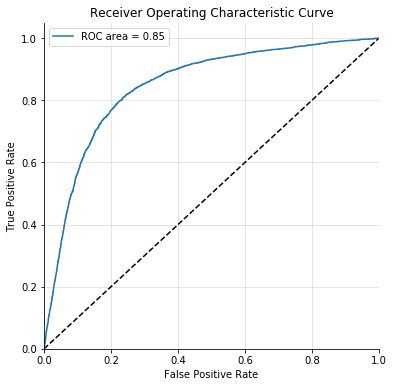

In [99]:
plot_roc_df(model, X_test_processed, y_test, figsize=(6, 6))

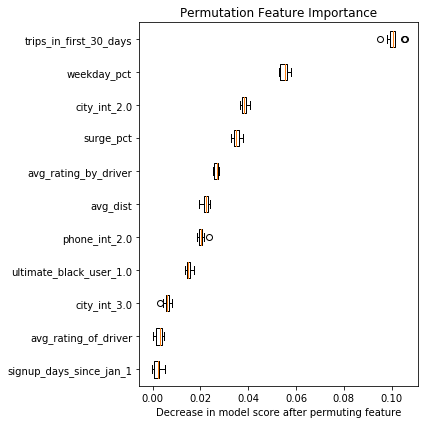

In [100]:
plot_top_features(model, X_test_processed, y_test, feature_names)

**Now try Gradient Boosting.**

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
grd = GradientBoostingClassifier(random_state=42)
grd.fit(X_train_processed, y_train)
print('Test accuracy with default hyperparameters: {}'.format(accuracy_score(grd.predict(X_test_processed), y_test)))

Test accuracy with default hyperparameters: 0.8174666666666667


**Tune learning_rate, n_estimators. Keep n_estimators relatively low for now for tuning efficiency.**

In [102]:
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier(learning_rate=0.5, min_samples_split=500, min_samples_leaf=50, max_depth=8,
                                   max_features='sqrt', subsample=0.8, random_state=10)
param_test1 = {'n_estimators':range(20,121,10)}
gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(X_train_processed, y_train)
print('Best params: {}\nBest training accuracy: {} '.format(gsearch1.best_params_, gsearch1.best_score_))
print('Test accuracy: {}'.format(accuracy_score(gsearch1.best_estimator_.predict(X_test_processed), y_test)))

Best params: {'n_estimators': 100}
Best training accuracy: 0.9081022056473422 
Test accuracy: 0.8346


**Tune max_depth, min_samples_split.**

In [121]:
model2 = GradientBoostingClassifier(learning_rate=0.5, n_estimators=100, max_features='sqrt', 
                                    subsample=0.8, random_state=10)
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1601,200)}
gsearch2 = GridSearchCV(estimator = model2, param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(X_train_processed, y_train)
print('Best params: {}\nBest training accuracy: {} '.format(gsearch2.best_params_, gsearch2.best_score_))
print('Test accuracy: {}'.format(accuracy_score(gsearch2.best_estimator_.predict(X_test_processed), y_test)))

Best params: {'max_depth': 7, 'min_samples_split': 1200}
Best training accuracy: 0.9081740171363052 
Test accuracy: 0.8311333333333333


**Tune min_samples_leaf.**

In [122]:
model3 = GradientBoostingClassifier(learning_rate=0.5, n_estimators=100, max_depth=7, min_samples_split=1200, 
                                    max_features='sqrt', subsample=0.8, random_state=10)
param_test3 = {'min_samples_leaf':range(20,71,10)}
gsearch3 = GridSearchCV(estimator = model3, param_grid = param_test3, scoring='roc_auc', n_jobs=4, cv=5)
gsearch3.fit(X_train_processed, y_train)
print('Best params: {}\nBest training accuracy: {} '.format(gsearch3.best_params_, gsearch3.best_score_))
print('Test accuracy: {}'.format(accuracy_score(gsearch3.best_estimator_.predict(X_test_processed), y_test)))

Best params: {'min_samples_leaf': 30}
Best training accuracy: 0.910319014526927 
Test accuracy: 0.8341333333333333


**Tune max_features.**

In [123]:
model4 = GradientBoostingClassifier(learning_rate=0.5, n_estimators=100, max_depth=7, min_samples_split=1200, 
                                    min_samples_leaf=30, subsample=0.8, random_state=10)
param_test4 = {'max_features':range(3,11,2)}
gsearch4 = GridSearchCV(estimator = model4, param_grid = param_test4, scoring='roc_auc', n_jobs=4, cv=5)
gsearch4.fit(X_train_processed, y_train)
print('Best params: {}\nBest training accuracy: {} '.format(gsearch4.best_params_, gsearch4.best_score_))
print('Test accuracy: {}'.format(accuracy_score(gsearch4.best_estimator_.predict(X_test_processed), y_test)))

Best params: {'max_features': 9}
Best training accuracy: 0.9140754411454907 
Test accuracy: 0.8418666666666667


**Tune subsample.**

In [124]:
model5 = GradientBoostingClassifier(learning_rate=0.5, n_estimators=100, max_depth=7, min_samples_split=1200, 
                                    min_samples_leaf=30, max_features=9, random_state=10)
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = model5, param_grid = param_test5, scoring='roc_auc', n_jobs=4, cv=5)
gsearch5.fit(X_train_processed, y_train)
print('Best params: {}\nBest training accuracy: {} '.format(gsearch5.best_params_, gsearch5.best_score_))
print('Test accuracy: {}'.format(accuracy_score(gsearch5.best_estimator_.predict(X_test_processed), y_test)))

Best params: {'subsample': 0.9}
Best training accuracy: 0.9168913492726729 
Test accuracy: 0.8428


**Cut the learning rate in half with twice the number of trees.**

Test accuracy: 0.8448666666666667


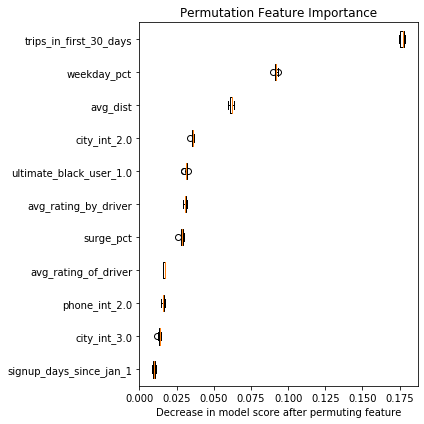

In [126]:
from sklearn.metrics import accuracy_score
model6 = GradientBoostingClassifier(learning_rate=0.25, n_estimators=200, max_depth=7, min_samples_split=1200, 
                                    min_samples_leaf=30, max_features=9, subsample=0.9, random_state=10)
model6.fit(X_train_processed, y_train)
print('Test accuracy: {}'.format(accuracy_score(model6.predict(X_test_processed), y_test)))
feature_names = X_train_processed_df.columns
plot_top_features(model6, X_train_processed, y_train, feature_names)

**Divide learning rate by 10 and multiply number of trees times 10.**

Test accuracy: 0.8496


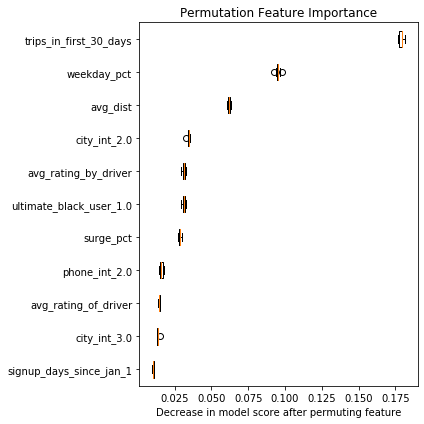

In [128]:
model7 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000, max_depth=7, min_samples_split=1200, 
                                    min_samples_leaf=30, max_features=9, subsample=0.9, random_state=10)
model7.fit(X_train_processed, y_train)
y_pred = model7.predict(X_test_processed)
print('Test accuracy: {}'.format(accuracy_score(y_pred, y_test)))
feature_names = X_train_processed_df.columns
plot_top_features(model7, X_train_processed, y_train, feature_names)

In [111]:
from sklearn.metrics import classification_report
target_names = ['Not Active', 'Active']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Not Active       0.87      0.89      0.88      9359
      Active       0.81      0.79      0.80      5641

    accuracy                           0.85     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.85      0.85      0.85     15000



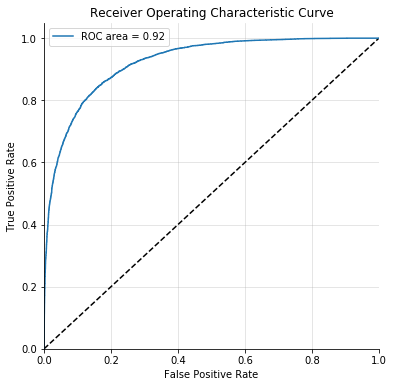

In [112]:
plot_roc_df(model7, X_test_processed, y_test, figsize=(6, 6))

**Now try Naive Bayes. Not expecting a great result as the continuous data in not normally distributed.**

In [113]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_processed, y_train)
print('Test accuracy with default hyperparameters: {}'.format(accuracy_score(clf.predict(X_test_processed), y_test)))

Test accuracy with default hyperparameters: 0.7216


In [114]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test_processed)
steps = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
target_names = ['Not Active', 'Active']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Not Active       0.77      0.79      0.78      9359
      Active       0.64      0.60      0.62      5641

    accuracy                           0.72     15000
   macro avg       0.70      0.70      0.70     15000
weighted avg       0.72      0.72      0.72     15000



**Would need to do feature engineering to improve this model, may not make a significant difference with this data.**    

**Move on with best model = tuned Gradient Boosting, with F1-score of 0.8 on predicting riders who are active after 6 months.**

## 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).  

The top three features in the best performing model are: 

1. Number of trips in the first 30 days
2. Weekday percent
3. Average distance per trip taken in first 30 days


The number of trips in the first 30 days is significantly more important than the rest of the features, so creating a positive experience for new riders is crucial for longterm retention. 

Weekday percent is interesting and it would be good to dig into this further to try and discern what is driving its' influence. Is it business-related? School? Medical appointments? Or is the effect a negative one and the true influence is low weekday and therefore high weekend percent? 

Average distance in the first 30 days also warrants a bit more investigation, although it appears to have less effect on the model. Is the affect from riders who take many short trips? Or longer trips? Or just the fact that riders take trips and the number is non-zero? 